In [1]:
import numpy as np
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from typing import Union, List, Literal
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time


import logistic_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict

np.random.seed(44)  # for comparison of results

In [2]:
def confusion_matrix(
    y_true: Union[np.ndarray, pd.DataFrame], y_pred: Union[np.ndarray, pd.DataFrame]
) -> np.ndarray:
    """
    function returns confusion matrix

    """
    y_true = y_true.astype(bool)
    y_pred = y_pred.astype(bool)

    TP = np.sum(y_true & y_pred)
    TN = np.sum(~y_true & ~y_pred)
    FP = np.sum(~y_true & y_pred)
    FN = np.sum(y_true & ~y_pred)

    return np.array([[TP, FP], [FN, TN]])


def balanced_accuracy(
    y_true: Union[np.ndarray, pd.DataFrame], y_pred: Union[np.ndarray, pd.DataFrame]
) -> float:
    """
    function returns balanced accuracy of classification
    """

    conf = confusion_matrix(y_true, y_pred)
    TPR = conf[0, 0] / (conf[0, 0] + conf[1, 0])
    TNR = conf[1, 1] / (conf[1, 1] + conf[0, 1])

    return 0.5 * (TPR + TNR)

In [3]:
def compare_methods(
    X: Union[np.ndarray, pd.DataFrame],
    y: Union[np.ndarray, pd.DataFrame],
    k=5,
    test_size=0.2,
    interaction=False,
):
    """
    function compares performance of several build-in classification models

    """
    methods = ["decision tree", "random forest", "LDA", "QDA"]
    optimizers = ["sgd", "adam", "iwls"]
    results = {}

    for iteration in range(k):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=iteration
        )

        for method in methods:
            if method == "LDA":
                model = LinearDiscriminantAnalysis()
            elif method == "QDA":
                model = QuadraticDiscriminantAnalysis()
            elif method == "decision tree":
                model = DecisionTreeClassifier()
            elif method == "random forest":
                model = RandomForestClassifier()

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            results[method] = results.get(method, []) + [
                balanced_accuracy(y_test, y_pred)
            ]

        # logistic regression
        for optimizer in optimizers:
            model = logistic_regression.LogisticRegressor(descent_algorithm=optimizer)
            model.fit(X_train, y_train)
            results[optimizer] = results.get(optimizer, []) + [
                model.balanced_accuracy(X_test, y_test)
            ]

        if interaction:
            for optimizer in optimizers:
                model = logistic_regression.LogisticRegressor(
                    descent_algorithm=optimizer, include_interactions=True
                )
                model.fit(X_train, y_train)
                results[optimizer + "_inter"] = results.get(
                    optimizer + "_inter", []
                ) + [model.balanced_accuracy(X_test, y_test)]
    results = pd.DataFrame(results)
    results = results.melt(var_name="Algorithm", value_name="Balanced Accuracy")
    return results

In [4]:
def process_df(name):
    df = pd.read_csv(f"data/{name}.csv")
    if len(df) > 12000:
        print(f"Downsampling {name} to 12000 samples form {len(df)} samples")
        df = df.sample(n=12000)
    df_y = df["target"]
    df_X = df.drop(columns=["target"])
    mean = df_X.mean()
    std = df_X.std()
    df_X = (df_X - mean) / std
    return df_X, df_y

In [5]:
def visualize_balanced_accuracy(metrisc_df, name, folder):
    plt.figure(figsize=(14, 5))
    sns.set_theme(style="whitegrid")
    sns.boxplot(
        data=metrisc_df,
        x="Algorithm",
        y="Balanced Accuracy",
        palette=sns.color_palette("husl", 10),
    )
    plt.title(f"Balanced Accuracy for {name} dataset", fontsize=15)
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("Balanced Accuracy", fontsize=12)
    plt.savefig(f"plots/{folder}/{name}.png")
    plt.show()

In [6]:
X, y = process_df("raisin")
results = compare_methods(X, y, k=2, interaction=False)

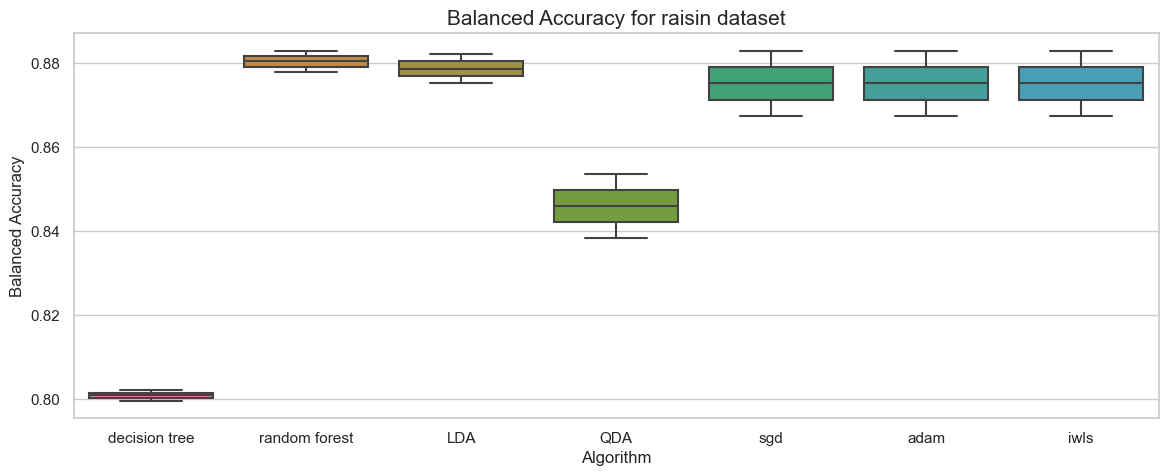

In [8]:
visualize_balanced_accuracy(results, "raisin", "accuracy_comparison")

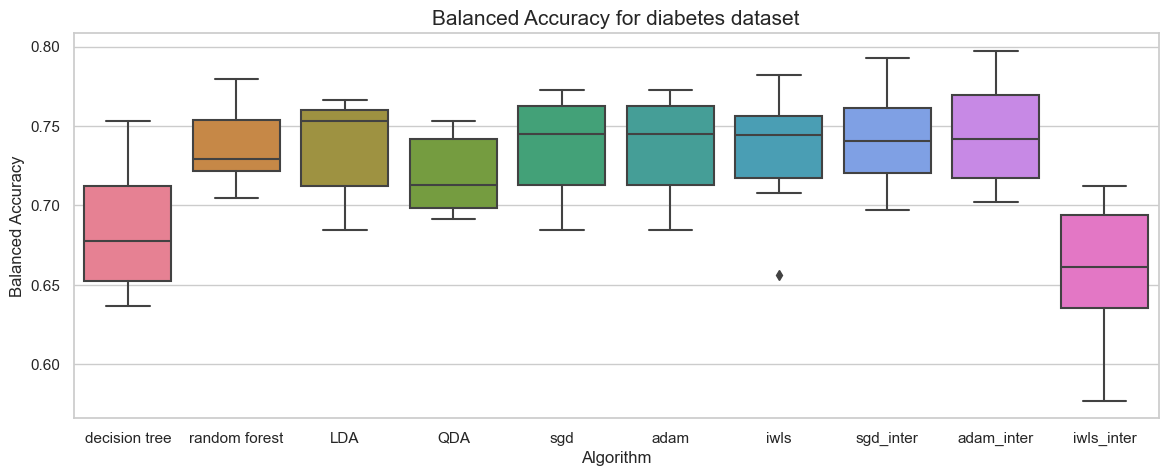

Time run our at epoch 45.
Time run our at epoch 44.
Time run our at epoch 45.
Time run our at epoch 45.
Time run our at epoch 46.
Time run our at epoch 44.
Time run our at epoch 42.
Time run our at epoch 45.
Time run our at epoch 45.
Time run our at epoch 44.
Time run our at epoch 43.
Time run our at epoch 38.
Time run our at epoch 55.
Time run our at epoch 55.
Time run our at epoch 52.
Time run our at epoch 51.
Time run our at epoch 51.
Time run our at epoch 50.
Time run our at epoch 46.
Time run our at epoch 47.


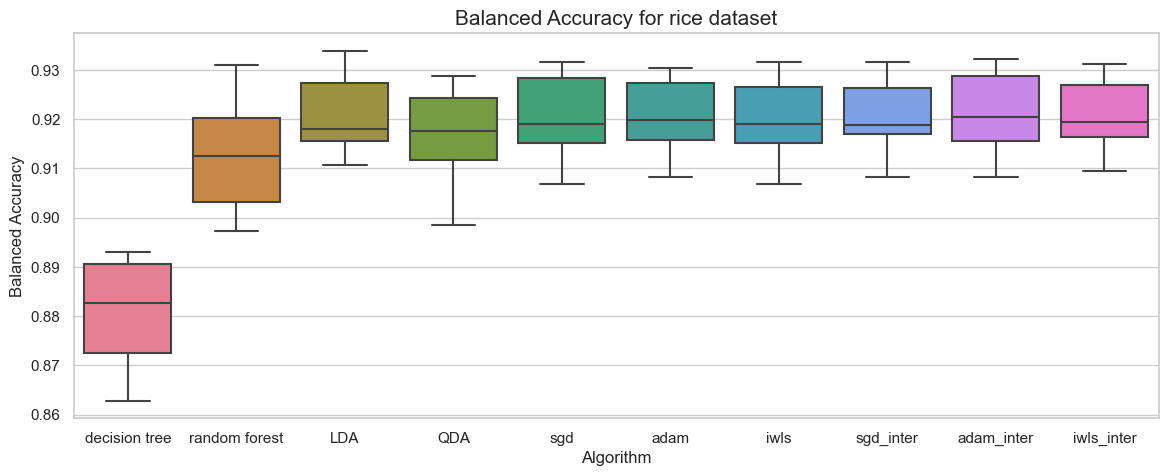

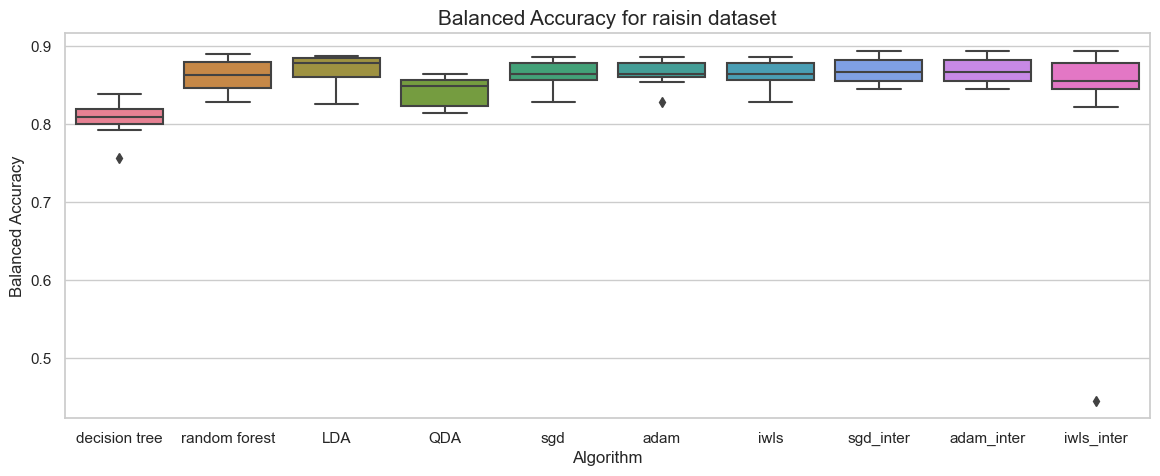

In [9]:
sets = ["diabetes", "rice", "raisin"]
for name in sets:
    X, y = process_df(name)
    results = compare_methods(X, y, k=10, interaction=True)
    folder = "accuracy_comparison_interactions"
    visualize_balanced_accuracy(results, name, folder)

Time run our at epoch 256.
Time run our at epoch 245.
Time run our at epoch 236.
Time run our at epoch 239.
Time run our at epoch 238.
Time run our at epoch 241.
Time run our at epoch 240.
Time run our at epoch 241.
Time run our at epoch 231.
Time run our at epoch 231.


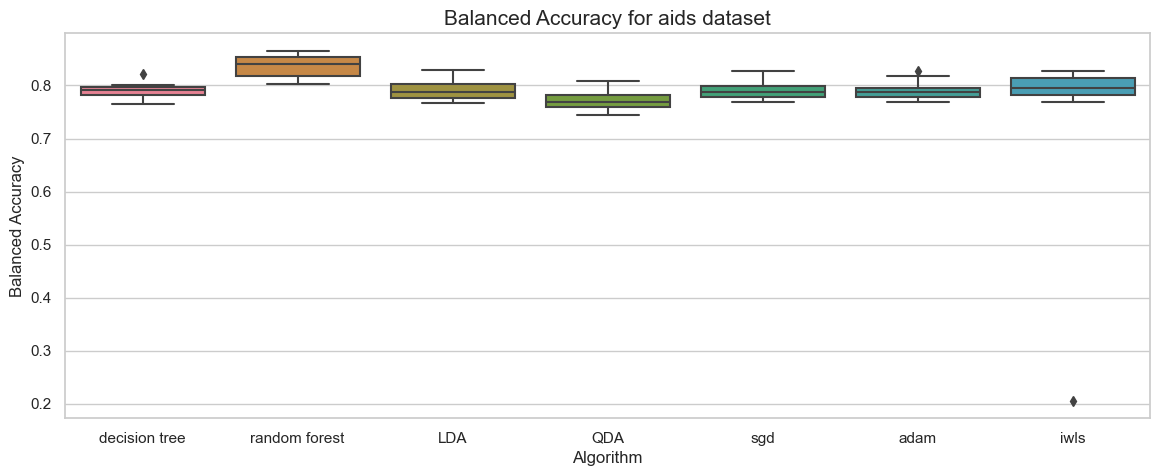

Time run our at epoch 204.
Time run our at epoch 206.
Time run our at epoch 196.
Time run our at epoch 223.
Time run our at epoch 208.
Time run our at epoch 219.
Time run our at epoch 208.
Time run our at epoch 217.
Time run our at epoch 219.
Time run our at epoch 213.


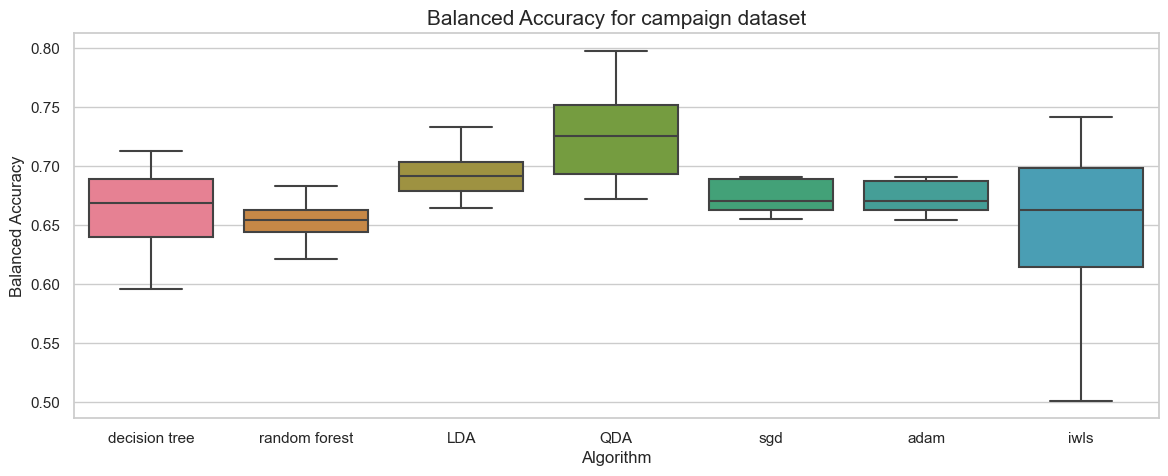

Time run our at epoch 273.
Time run our at epoch 271.
Time run our at epoch 266.
Time run our at epoch 265.
Time run our at epoch 276.
Time run our at epoch 267.
Time run our at epoch 264.
Time run our at epoch 290.
Time run our at epoch 273.
Time run our at epoch 277.


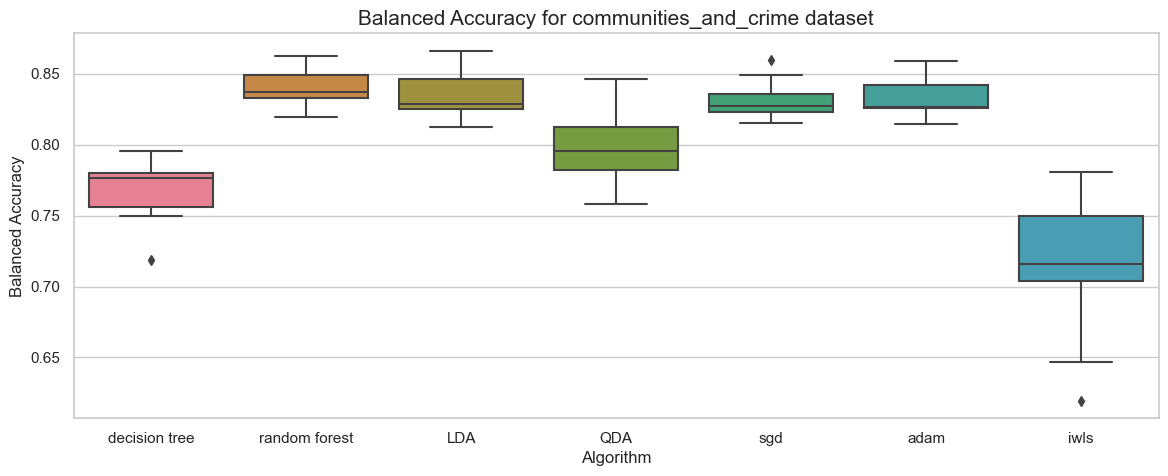

Downsampling dry_bean to 12000 samples form 13611 samples
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.


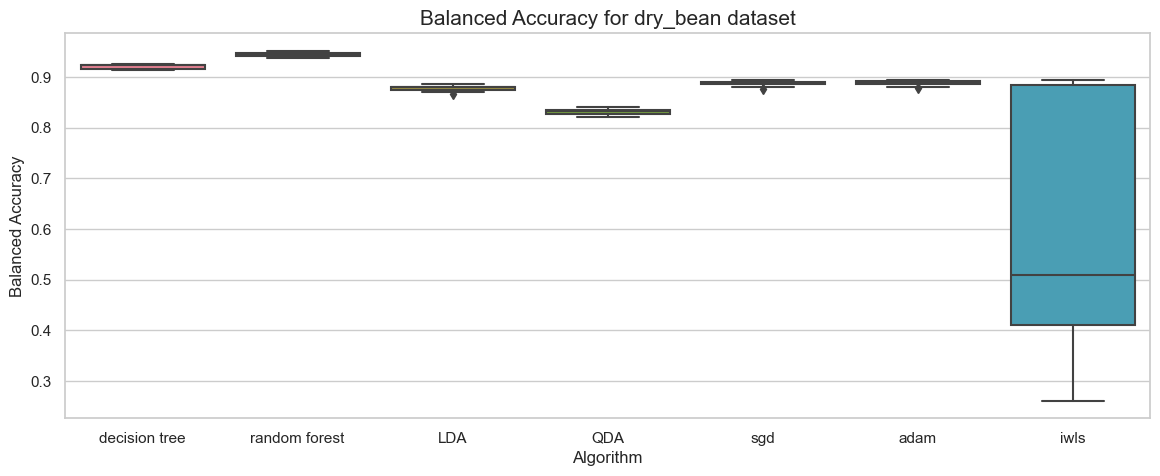

Downsampling heart to 12000 samples form 253680 samples
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.


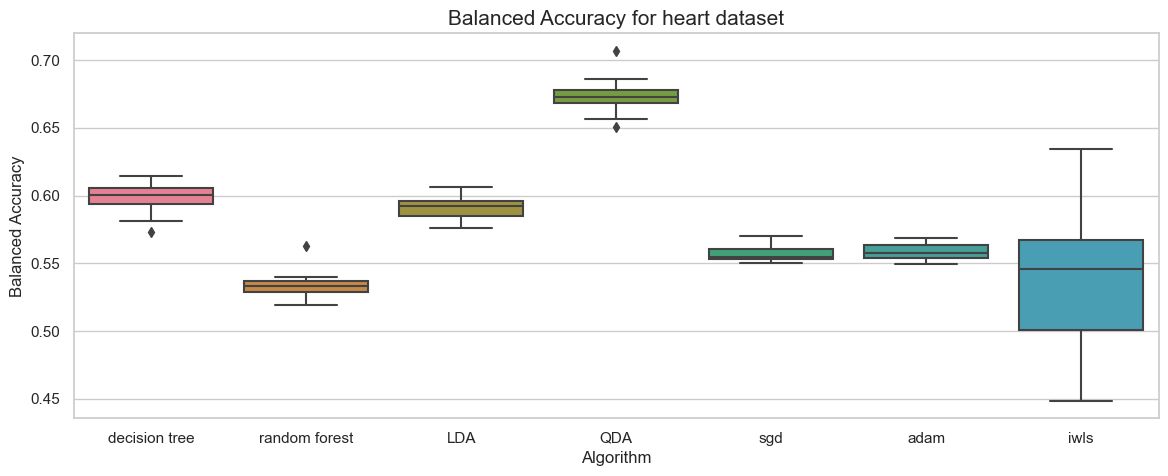

Downsampling polish_companies_bankruptcy to 12000 samples form 20280 samples
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.
Time run our at epoch 1.


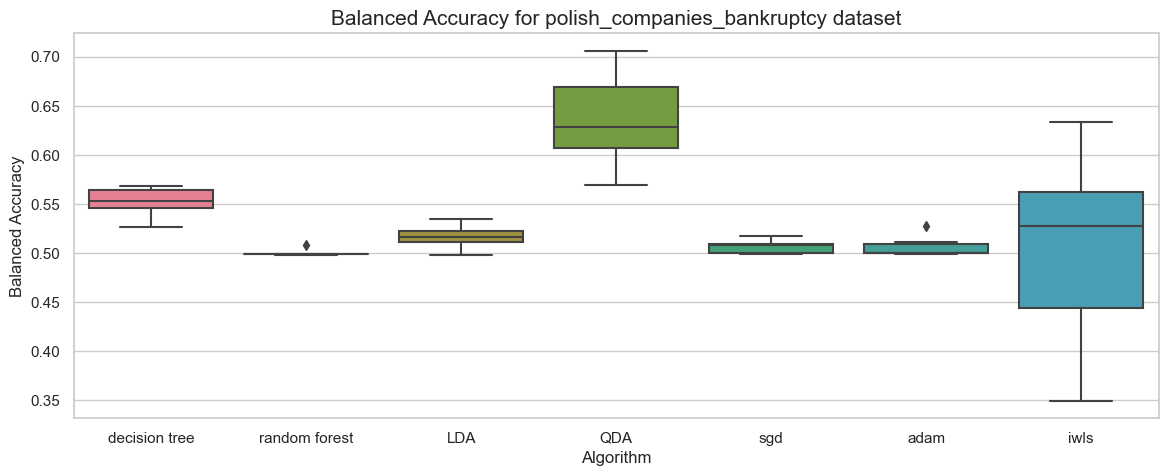

In [10]:
sets = ["aids", "campaign", "communities_and_crime", "dry_bean", "heart", "polish_companies_bankruptcy"]
for name in sets:
    X, y = process_df(name)
    results = compare_methods(X, y, k=10, interaction=False)
    folder = "accuracy_comparison"
    visualize_balanced_accuracy(results, name, folder)